In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pokemon.csv")

In [3]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
df['type1'].fillna('unknown',inplace=True)
df['type2'].fillna('unknown',inplace=True)
df['type'] = df['type1']+ ',' + df['type2']
df['is_grass'] = df['type'].apply(lambda x:'grass' if 'grass' in x else 'not grass' )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [5]:
df['type']

0         grass,poison
1         grass,poison
2         grass,poison
3         fire,unknown
4         fire,unknown
            ...       
796       steel,flying
797        grass,steel
798        dark,dragon
799    psychic,unknown
800        steel,fairy
Name: type, Length: 801, dtype: object

In [6]:
df_0 = df.query("is_legendary == 0")

In [7]:
df_0.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,type,is_grass
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,"grass,poison",grass
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,"grass,poison",grass
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,122,120,80,grass,poison,100.0,1,0,"grass,poison",grass
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,60,50,65,fire,unknown,8.5,1,0,"fire,unknown",not grass
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,80,65,80,fire,unknown,19.0,1,0,"fire,unknown",not grass


In [8]:
df_0.shape

(731, 43)

In [9]:
df_1 = df.query("is_legendary == 1")

In [10]:
df_1.shape

(70, 43)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
clf = RandomForestClassifier(random_state=0)

In [13]:
feature = ['attack', 'defense', 'hp']

df0 = df_0[feature][:5].values
df1 = df_1[feature][:5].values

data = {
    "data": np.vstack((df0,df1)),
    "target": [0]*5+[1]*5
}

In [14]:
data

{'data': array([[ 49,  49,  45],
        [ 62,  63,  60],
        [100, 123,  80],
        [ 52,  43,  39],
        [ 64,  58,  58],
        [ 85, 100,  90],
        [ 90,  85,  90],
        [100,  90,  90],
        [150,  70, 106],
        [100, 100, 100]], dtype=int64),
 'target': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]}

In [15]:
res = clf.fit(data['data'], data['target'])

In [16]:
res.predict([[1,2,3]])

array([0])

In [17]:
res.predict([[100,200,300]])

array([1])

In [18]:
# from sklearn.metrics import accuracy_score

In [19]:
# accuracy_score(res, y_pred=[0,1])

predict = clf.predict(df_0[feature][:5].values)
print(classification_report([0]*5, predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [20]:
pd.set_option('display.max_rows', None)  # 行

# df_1['name']

In [21]:
grass = df.query("type1 == 'grass' or type2 == 'grass'")
not_grass = df.query("type1 != 'grass' and type2 != 'grass'")

In [22]:
grass.shape

(97, 43)

In [23]:
grass08 = grass.sample(frac=0.8)
grass08.shape

(78, 43)

In [24]:
not_grass.shape

(704, 43)

In [25]:
grass_not64 = not_grass.sample(n=78)

pd.set_option('display.max_columns', None)
feature2 = ['attack', 'defense', 'hp', 'sp_attack', 'sp_defense', 'speed']

In [26]:
grass08[feature2].head()

,attack,defense,hp,sp_attack,sp_defense,speed
649,61,65,56,48,45,38
69,90,50,65,85,45,55
545,27,60,40,37,50,66
252,65,45,50,85,65,95
596,50,91,44,24,86,10


In [27]:
not_grass[feature2].head()

,attack,defense,hp,sp_attack,sp_defense,speed
3,52,43,39,60,50,65
4,64,58,58,80,65,80
5,104,78,78,159,115,100
6,48,65,44,50,64,43
7,63,80,59,65,80,58


In [28]:
df0 = grass08[feature2].values
df1 = grass_not64[feature2].values

data = {
    "data": np.vstack((df0,df1)),
    "target": ['grass']*78+['not grass']*78
}

In [29]:
score_list = []
for i in range(200):
    clf = RandomForestClassifier(random_state=42, n_estimators=i+1, n_jobs=-1)
    res = clf.fit(data['data'], data['target'])
    text_data = df.sample(40)
    y_pred = clf.predict(text_data[feature2])
    y_true =  text_data['is_grass']
    score_list.append(accuracy_score(y_true, y_pred))

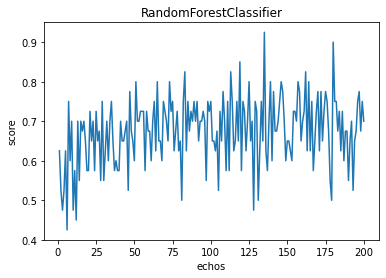

In [30]:
x = range(1,len(score_list)+1)
plt.plot(x, score_list);
plt.title('RandomForestClassifier')
plt.ylabel('score')
plt.xlabel('echos');

In [31]:
max_data, max_index = 0, 0
for index, data in enumerate(score_list):
    if data > max_data:
        max_data = data
        max_index = index

In [32]:
print(f"儅 n_estimators = {max_index+1} 的時候，隨機森林表現最好，準確率是{max_data}")

儅 n_estimators = 135 的時候，隨機森林表現最好，準確率是0.925
